<a href="https://colab.research.google.com/github/egitimplus/ysa_uskudar/blob/main/Say%C4%B1sal_G%C3%B6r%C3%BCnt%C3%BC_%C4%B0%C5%9Fleme_Ara_S%C4%B1nav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SAYISAL GÖRÜNTÜ İŞLEME - ARA SINAV (ÖDEV)

Yunus Emre Çevik

Öğrenci No: 234329053

#1. Veri Yükleme

## Kütüphanelerin İçe Aktarılması

Dosya/Dizin işlemleri için *os*, Veri işleme için **pandas**, sayısal işlemler için **numpy**, görselleştirme için **matplotlib** ve **seaborn** kütüphanelerini import edelim.

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2  # opencv for python package
from skimage import exposure
from scipy.ndimage import zoom
warnings.filterwarnings('ignore')
sns.set()

## Veri Setinin Yüklenmesi

Github'dan git clone methodu ile görüntüleri indirelim. Görüntüleri indirdikten sonra /nih klasörünün içerisindeki train-small.csv dosyasını pandas dataframe aktararak verilerimizi inceleyelim.

In [3]:
!git clone https://github.com/hardik0/AI-for-Medicine-Specialization

Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 27.11 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.


Dosyalar ile çalışabilmemiz için öncelikle ilgili klasöre gitmemiz gerekli.

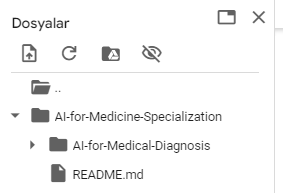

In [4]:
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/

/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


pd.read_csv() fonksiyonu ile röntgen verilerini pandas veri çerçevesine aktardık.

In [5]:
# train_df olarak adlandırılan veri çerçevesine CSV dosyasını yükleme
train_df = pd.read_csv("nih/train-small.csv")

df.head() metodu ile ilk 5 ürünü listeledik.

In [6]:
# İlk birkaç satırı inceleme
train_df.head()

,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


Farklı sayıda satır incelemek için parametre olarak sayı verebiliriz.

In [7]:
train_df.head(10)

,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0
5,00001232_002.png,1,1,0,0,1,0,0,0,1,0,0,1232,0,0,0
6,00017135_000.png,0,0,0,0,0,0,0,0,0,0,0,17135,0,0,0
7,00027235_000.png,0,0,0,0,0,0,0,0,0,0,0,27235,0,0,0
8,00014197_007.png,0,0,0,0,0,0,0,0,0,0,0,14197,0,0,0
9,00011584_002.png,0,0,0,0,0,0,0,0,0,0,0,11584,0,0,0


Toplam satır ve sütunu görütülemek için df.shape niteliğini kullanabiliriz. 1. elemanı satırı 2. elemanı ise sütunu verir. Satırlar örnekleri, sütunlar ise öznitelikleri belirtmektedir.

In [8]:
print(f'Toplam {train_df.shape[0]} satır ve {train_df.shape[1]} sütun bulunmaktadır.')

Toplam 1000 satır ve 16 sütun bulunmaktadır.


## Veri Özelliklerinin İncelenmesi

Toplam 1000 örneğimiz var. Bu örneklerden kaç tanesinin benzersiz olduğunu tespit etmek için df.value_counts() kullanabiliriz. Bu method bize benzersiz olan kayıtların listesini döndürecektir. Veri çerçevesini incelediğimizde 20213 nolu hasta için 6 farklı kayıt olduğu anlaşılmaktadır. En altında ise 928 farklı kayıt olduğunu görebiliyoruz.

In [9]:
train_df['PatientId'].value_counts()

,count
PatientId,
20213,6
13003,4
13111,4
25628,3
8081,3
...,...
9326,1
4544,1
12903,1


df['PatientId'].value_counts().shape niteliğnin 1. elemanı ile de benzersiz gözlem sayısına ulaşabiliriz.

In [10]:
# Toplam satır ve sütun sayısını ekrana yazdırın.
print(f"Toplam {train_df['PatientId'].count()} adet gözlem içerisinden {train_df['PatientId'].value_counts().shape[0]} tane benzersiz hastaya ait gözlem bulunmuştur. ")

Toplam 1000 adet gözlem içerisinden 928 tane benzersiz hastaya ait gözlem bulunmuştur. 


Birden fazla görüntüsü olan hastaları bulmak için örnek sayısı 1'den fazla olan hastaları sayabiliriz. Toplamda 59 hastanın birden fazla görüntüsü bulunmaktadır.

In [11]:
duplicated_patients = train_df['PatientId'].value_counts()
len(duplicated_patients[duplicated_patients > 1])

59

df.info() metodu ile veri çerçevesi hakkında daha detaylı bilgiler öğrenebiliriz. Bu metod, veri çerçevesindeki her sütunun veri tipini, veri tiplerinin sayısal dağılımını, bellek kullanımını, eksik değerleri ve sütunların ve satırların toplamda kaç olduğu bilgisini gösterir.

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

Özet bilgileri incelediğimizde toplam 16 adet değişken olduğunu görüyoruz. Bu değişkenlerin bir tanesi object, kalanları ise int64 veri tipinde. 1000 adet gözlem için tüm değişkenlerde veri girilmiş.

Değişkenleri listelemek için df.keys() metodunu da kullanabiliriz. Tüm değişken isimlerini columns değişkenine alalım.

In [13]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


Image üstunu dosya yolunu ve PatientId hasta numarasını verdiği için bunları özniteliklerden çıkartabiliriz. Bu değişkenler hastalık ile ilgili bilgi içermemektedir. Bunları çıkardığımızda 14 adet değişken kalmış olup, aşağıda listelenmiştir.

In [14]:
# Gereksiz değişkenleri çıkartalım
columns.remove('Image')
columns.remove('PatientId')

# Kalan değişkenleriy azdıralım.
print(f"Toplam {len(columns)} değişken bulunmaktadır: {columns}")

Toplam 14 değişken bulunmaktadır: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


Her sınıf için pozitif olan değerleri bulalım. Bu sayede hangi hastalıktan kaç adet bulunduğunu tespit edebiliriz.

In [15]:
# Her sınıf için pozitif sınıfları yazdıralım
for column in columns:
    print(f"{column} etiketi için {train_df[column].sum()} örnek bulunmaktadır.")

Atelectasis etiketi için 106 örnek bulunmaktadır.
Cardiomegaly etiketi için 20 örnek bulunmaktadır.
Consolidation etiketi için 33 örnek bulunmaktadır.
Edema etiketi için 16 örnek bulunmaktadır.
Effusion etiketi için 128 örnek bulunmaktadır.
Emphysema etiketi için 13 örnek bulunmaktadır.
Fibrosis etiketi için 14 örnek bulunmaktadır.
Hernia etiketi için 2 örnek bulunmaktadır.
Infiltration etiketi için 175 örnek bulunmaktadır.
Mass etiketi için 45 örnek bulunmaktadır.
Nodule etiketi için 54 örnek bulunmaktadır.
Pleural_Thickening etiketi için 21 örnek bulunmaktadır.
Pneumonia etiketi için 10 örnek bulunmaktadır.
Pneumothorax etiketi için 38 örnek bulunmaktadır.


Pozitif adetlere baktığımızda ağırlıklı olarak Infiltration(175), Effusion(128), Atelectasis(106) bulunmaktadır. En az örnek ise Hernia(2) için bulunmaktadır.

# Görüntü Yükleme ve Görselleştirme

## Rastgele Görüntüler Seçme

SEÇİLEN RASTGELE 9 GÖRÜNTÜ


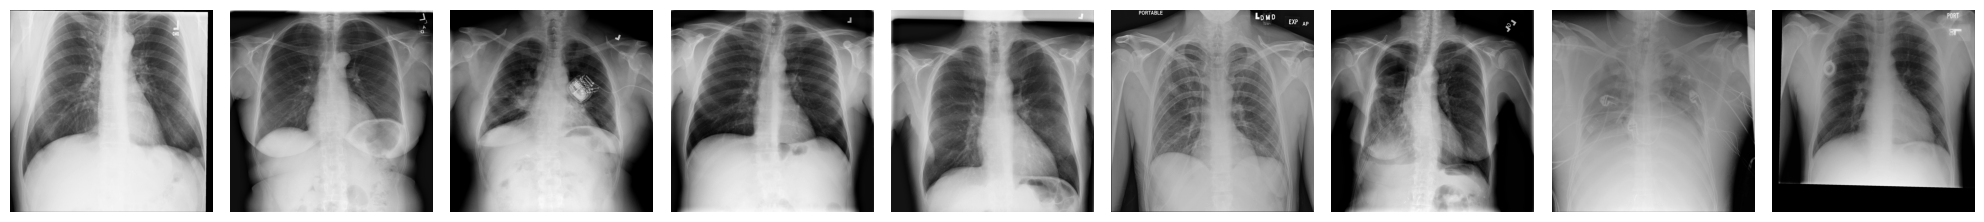

In [16]:
# Extract numpy values from Image column in data frame
images = train_df['Image'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = 'nih/images_small/'

print('SEÇİLEN RASTGELE 9 GÖRÜNTÜ')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(1, 9, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Adjust subplot parameters to give specified padding
plt.tight_layout()

Röntgen resimleri içerisinde np.random.choice() methodu ile rastgele 9 resim seçilmiştir.

## Rastgele Görüntülerinin İstatistiksel Özelliklerini Hesaplama

Bir görüntüdeki her piksel önemli klinik bilgiler taşıyabilir. Bu nedenle ön işlemenin ilk adımı örnek bir görüntünün temel istatistiklerini ve görsel özelliklerini anlamaktır. Veri setimizdeki görüntüler gri tonlamalıdır, yani yalnızca tek bir renk kanalı içerirler.


In [17]:
for i in range(9):
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    print(f"Image{i+1} : max pixel: {img.max():.4f}, min pixel: {img.min():.4f}, ortalama: {img.mean():.4f}, standart sapma: {img.std():.4f}")

Image1 : max pixel: 1.0000, min pixel: 0.0000, ortalama: 0.6455, standart sapma: 0.2617
Image2 : max pixel: 1.0000, min pixel: 0.0000, ortalama: 0.4708, standart sapma: 0.2716
Image3 : max pixel: 0.9686, min pixel: 0.0000, ortalama: 0.4348, standart sapma: 0.2803
Image4 : max pixel: 0.9804, min pixel: 0.0000, ortalama: 0.4796, standart sapma: 0.2757
Image5 : max pixel: 0.9961, min pixel: 0.0000, ortalama: 0.4907, standart sapma: 0.2488
Image6 : max pixel: 1.0000, min pixel: 0.0000, ortalama: 0.5020, standart sapma: 0.1855
Image7 : max pixel: 0.9961, min pixel: 0.0000, ortalama: 0.3600, standart sapma: 0.2738
Image8 : max pixel: 0.8431, min pixel: 0.0000, ortalama: 0.4506, standart sapma: 0.1801
Image9 : max pixel: 0.9137, min pixel: 0.0000, ortalama: 0.3462, standart sapma: 0.2406


Seçilen 9 resmin piksel değerleri 0 ila 1 arasında değişir; ortalama değer 0,3462 ile 0,6455 ve standart sapma 0,1801 ile 0.2803 arasında değişmektedir. Bu istatistikler görüntü normalleştirme teknikleri için çok önemlidir.

## Histogram Çizimi

Piksel yoğunluğu dağılımını daha iyi anlamak için piksel değerlerinin bir histogramını oluşturdum. Bu histogram, göstergenin bir parçası olarak çizilen ortalama ve standart sapma ile görüntü istatistiklerine ilişkin anlayışımızı güçlendirir.


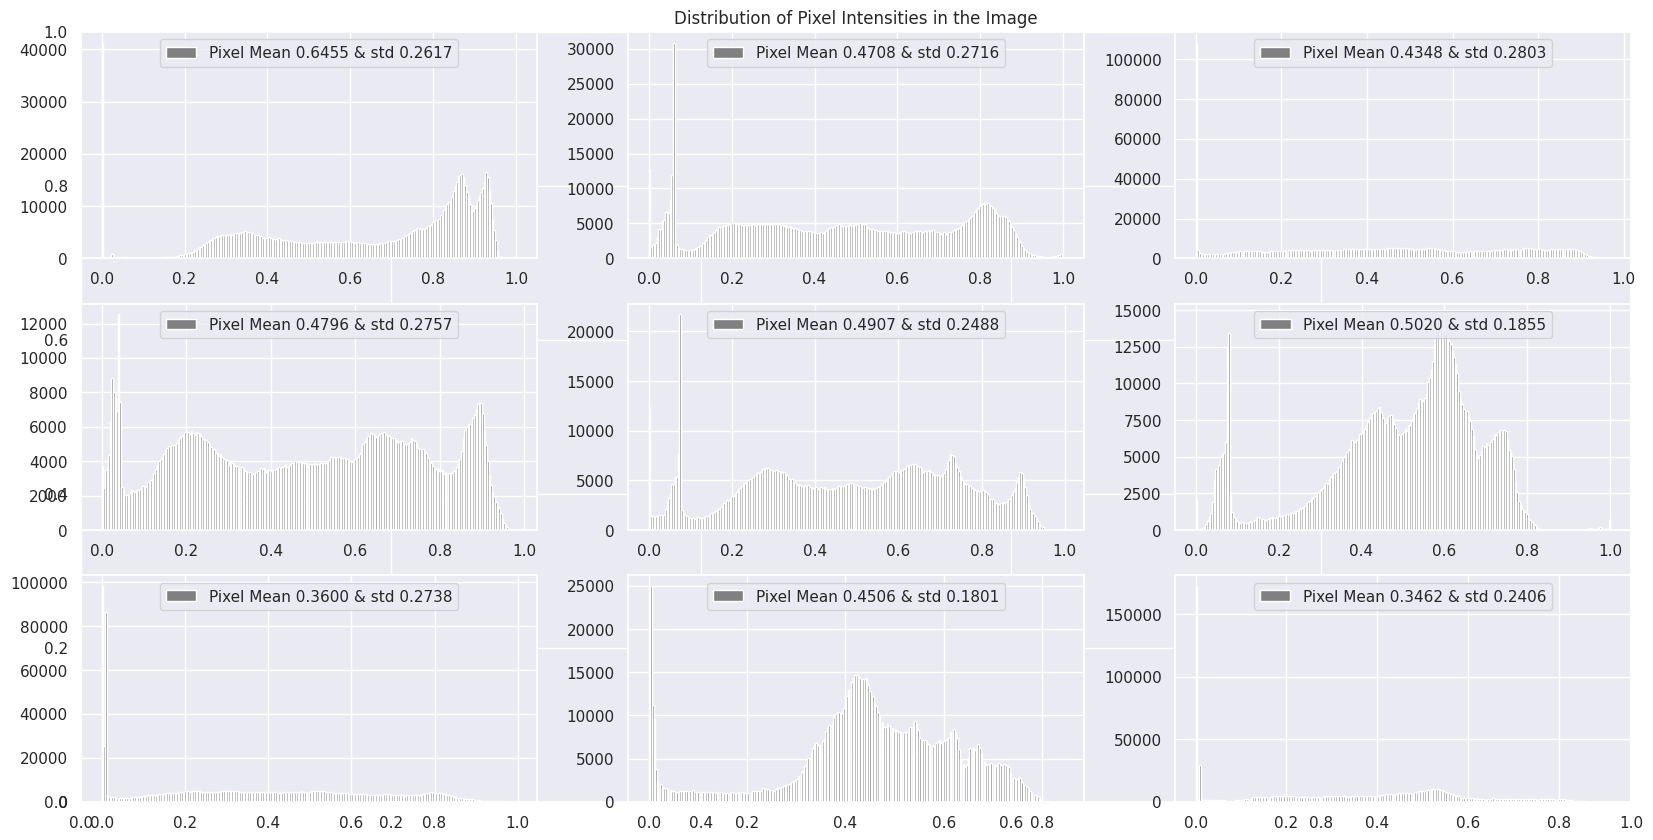

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(20,10))
plt.title('Distribution of Pixel Intensities in the Image')

for i in range(9):
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.subplot(3, 3, i + 1)
    plt.hist(img.ravel(), label=f'Pixel Mean {np.mean(img):.4f} & std {np.std(img):.4f}', bins=256, color='gray')
    plt.legend(loc='upper center')

plt.show()
plt.tight_layout()

# Görüntü İşleme, İyileştirme ve Gürültü Azaltma

Görüntü İşleme için CV adının kendi sınıfımızı yazalım. Sınıfımızı yazarak yapılacak her işlem için aynı kodları tekrar yazmamıza gerek kalmayacak.

In [2]:
class CV:
    img_dir = 'nih/images_small/'
    contrast_stretching = None
    histogram_equalization = None
    gamma_correction = None
    gaussian_filtered = None
    median_filtered = None
    rotated_image = None
    flipped_horizontal = None
    filtered_image = None
    resized_image = None
    sharpened_image = None

    def __init__(self, image):
        self.raw_image = plt.imread(os.path.join(self.img_dir, image))
        self.orginal_image = plt.imread(os.path.join(self.img_dir, image))

    def change_raw_image(self, image):
        self.raw_image = image

    def statistics(self):
        return f"maximum: {self.raw_image.max():.4f}, minimum: {self.raw_image.min():.4f}, ortalama: {self.raw_image.mean():.4f}, standart sapma: {self.raw_image.std():.4f}"

    def histogram(self):
        sns.distplot(self.raw_image.ravel(), label=f'Pixel Mean {np.mean(self.raw_image):.4f} & Standard Deviation {np.std(self.raw_image):.4f}', kde=False)
        plt.legend(loc='upper center')
        plt.title('Distribution of Pixel Intensities in the Image')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('# Pixels in Image')
        plt.show()

    def contrast_stretching(self, data={}):
        # Apply contrast stretching

        inplace = data.get('inplace', True)
        # Calculate minimum and maximum for contrast stretching

        min_val = data.get('min', self.raw_image.min())
        max_val = data.get('min', self.raw_image.max())


        contrast_stretched = (self.raw_image - min_val) / (max_val - min_val)  # Normalize to [0, 1]
        contrast_stretched = (contrast_stretched * 255).astype(np.uint8)  # Scale to [0, 255] for visualization

        if inplace:
            self.raw_image = contrast_stretched

        self.contrast_stretching = contrast_stretched


    def histogram_equalization(self, data={}):
        # Apply histogram equalization after contrast stretching
        # Apply histogram equalization using skimage

        inplace = data.get('inplace', True)

        equalized_image = exposure.equalize_hist(self.raw_image)  # Returns values in [0, 1]
        equalized_image = (equalized_image * 255).astype(np.uint8)    # Scale to [0, 255]

        if inplace:
            self.raw_image = equalized_image

        self.histogram_equalization = equalized_image
        return equalized_image

    def gamma_correction(self, data={}):
        # Apply gamma correction on the equalized image

        inplace = data.get('inplace', True)
        gamma = data.get('gamma', 1.2)

        gamma_corrected = np.power(self.raw_image / 255.0, gamma) * 255
        gamma_corrected = gamma_corrected.astype(np.uint8)

        if inplace:
            self.raw_image = gamma_corrected

        self.gamma_correction = gamma_corrected
        return gamma_corrected

    def median_filtered(self, data={}):
        # Apply Median Filtering

        inplace = data.get('inplace', True)
        value = data.get('value', 5)

        median_filtered = cv2.medianBlur(self.raw_image, 5)

        if inplace:
            self.raw_image = median_filtered

        self.median_filtered = median_filtered
        return median_filtered

    def gaussian_filtered(self, data={}):
        # Apply Gaussian Blur

        inplace = data.get('inplace', True)

        gaussian_filtered = cv2.GaussianBlur(self.raw_image, (5, 5), 0)

        if inplace:
            self.raw_image = gaussian_filtered

        self.gaussian_filtered = gaussian_filtered
        return gaussian_filtered

    def rotate(self, data={}):
        # Example: Rotate the image by 10 degrees

        inplace = data.get('inplace', True)
        angle = data.get('angle', 10)

        center = (self.raw_image.shape[1] // 2, self.raw_image.shape[0] // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle=angle, scale=1.0)
        rotated_image = cv2.warpAffine(self.raw_image, rotation_matrix, (self.raw_image.shape[1], self.raw_image.shape[0]))

        if inplace:
            self.raw_image = rotated_image

        self.rotated_image = rotated_image
        return rotated_image

    def flipped_horizontal(self, data={}):

        inplace = data.get('inplace', True)

        # Horizontal Flip
        flipped_horizontal = cv2.flip(self.raw_image, 1)

        if inplace:
            self.raw_image = flipped_horizontal

        self.flipped_horizontal = flipped_horizontal
        return flipped_horizontal

    def fourier_transform_filtered(self, data={}):

        inplace = data.get('inplace', True)

        # Apply Fourier Transform and shift it to center low frequencies
        dft = cv2.dft(np.float32(self.raw_image), flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shifted = np.fft.fftshift(dft)

        # Create a mask for filtering
        rows, cols = self.raw_image.shape
        crow, ccol = rows // 2 , cols // 2
        mask = np.zeros((rows, cols, 2), np.uint8)
        mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # Center low frequencies pass

        # Apply mask and inverse DFT
        fshift = dft_shifted * mask
        f_ishift = np.fft.ifftshift(fshift)
        filtered_image = cv2.idft(f_ishift)
        filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

        # Normalize and display the filtered image
        filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)

        if inplace:
            self.raw_image = filtered_image

        self.filtered_image = filtered_image
        return filtered_image

    def sharpened_image(self, data={}):
        inplace = data.get('inplace', True)

        # Step 4: Apply sharpening using an unsharp masking kernel
        sharpening_kernel = np.array([[-1, -1, -1],
                                    [-1,  9, -1],
                                    [-1, -1, -1]])
        sharpened_image = np.clip(cv2.filter2D(self.raw_image, -1, sharpening_kernel), 0, 255).astype(np.uint8)

        if inplace:
            self.raw_image = sharpened_image

        self.sharpened_image = sharpened_image
        return sharpened_image

    def resized_image(self, data={}):
        # Step 5: Apply bicubic interpolation to upscale the image by a factor of 2
        inplace = data.get('inplace', True)
        scale_factor = data.get('scale_factor', 2)
        order = data.get('order', 3)

        resized_image = zoom(self.raw_image, scale_factor, order=order)  # Bicubic interpolation with `order=3`

        if inplace:
            self.raw_image = resized_image

        self.resized_image = resized_image
        return resized_image

    def draw_sharpened(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1), plt.imshow(self.sharpened_image, cmap='gray'),plt.title("Sharpened Image")
        plt.subplot(1, 2, 2), plt.imshow(self.resized_image, cmap='gray'),plt.title("Interpolated (Upscaled) Image")


        plt.tight_layout()
        plt.show()

    def draw_rotate(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1), plt.imshow(self.rotated_image, cmap='gray'), plt.title("Rotated Image")
        plt.subplot(1, 2, 2), plt.imshow(self.flipped_horizontal, cmap='gray'), plt.title("Horizontally Flipped Image")
        plt.show()

    def draw(self, histogram=False):
        x = 1

        if histogram:
            x = x + 1

        # Plot original image
        plt.figure(figsize=(18, 10))
        plt.subplot(x, 4, 1)
        plt.imshow(self.orginal_image, cmap='gray')
        plt.title('Original Image')

        # Plot contrast-stretched image
        plt.subplot(x, 4, 2)
        plt.imshow(self.contrast_stretching, cmap='gray')
        plt.title('Contrast-Stretched Image')

        # Plot contrast-equalized image
        plt.subplot(x, 4, 3)
        plt.imshow(self.histogram_equalization, cmap='gray')
        plt.title('Contrast Equalized Image')

        # Plot gamma-corrected image
        plt.subplot(x, 4, 4)
        plt.imshow(self.gamma_correction, cmap='gray')
        plt.title(f'Gamma-Corrected Image ')

        if histogram:
            # Plot original histogram
            plt.subplot(x, 4, 5)
            plt.hist(self.orginal_image.ravel(), bins=256, color='gray')
            plt.title("Original Image Histogram")

            # Plot contrast-stretched histogram
            plt.subplot(x, 4, 6)
            plt.hist(self.contrast_stretching.ravel(), bins=256, color='gray')
            plt.title("Contrast-Stretched Histogram")

            # Plot contrast-equalized histogram
            plt.subplot(x, 4, 7)
            plt.hist(self.histogram_equalization.ravel(), bins=256, color='gray')
            plt.title("Equalized Histogram")

            # Plot gamma-corrected histogram
            plt.subplot(x, 4, 8)
            plt.hist(self.gamma_correction.ravel(), bins=256, color='gray')
            plt.title("Gamma-Corrected Histogram")

        plt.tight_layout()
        plt.show()

    def draw_blur(self, histogram=False):
        x = 1

        if histogram:
            x = x + 1
        plt.figure(figsize=(8, 8))

        # Plot median-filtered image
        plt.subplot(x, 2, 1)
        plt.imshow(self.median_filtered, cmap='gray')
        plt.title(f'Median-Filtered Image ')

        # Plot gaussian-filtered image
        plt.subplot(x, 2, 2)
        plt.imshow(self.gaussian_filtered, cmap='gray')
        plt.title(f'Gaussian-Filtered Image ')

        if histogram:
            # Plot median-filtered histogram
            plt.subplot(x, 2, 3)
            plt.hist(self.median_filtered.ravel(), bins=256, color='gray')
            plt.title("Median-Filtered Histogram")

            # Plot gaussian-filtered histogram
            plt.subplot(x, 2, 4)
            plt.hist(self.gaussian_filtered.ravel(), bins=256, color='gray')
            plt.title("Gaussian-Filtered Histogram")



        plt.tight_layout()
        plt.show()

    def draw_filtered(self):
        plt.figure(figsize=(8, 8))
        plt.imshow(self.filtered_image, cmap='gray')
        plt.title("Frequency Domain Filtered Image")
        plt.axis("off")
        plt.show()

İlk resim için sınıfımızı çağıralım ve Kontrast Germe (Stretching), Histogram Eşitleme (Equalization), Gamma Düzeltme yapıp, görüntüleri Çizelim.


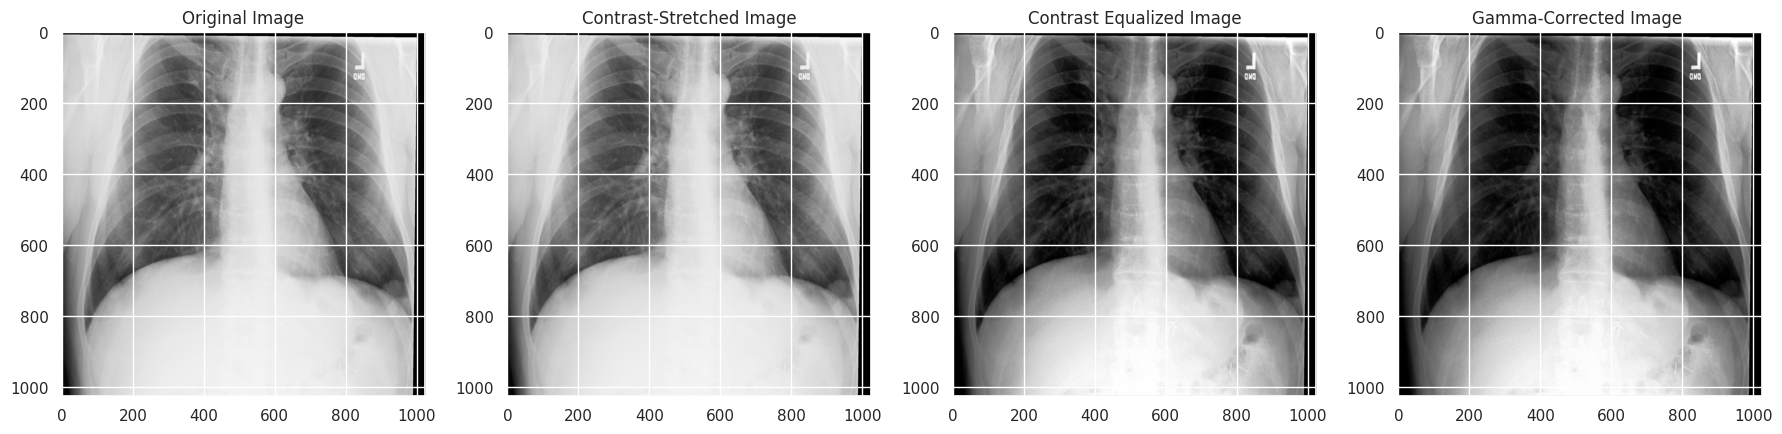

In [19]:
first_image = CV(random_images[0])

contrast_stretching = first_image.contrast_stretching()
histogram_equalization = first_image.histogram_equalization()
gamma_correction = first_image.gamma_correction()

first_image.draw()

Kontrast Germe (Contrast stretching), dijital görüntü işleme tekniklerinden biri olup bir görüntünün kontrastını artırmak için kullanılır. Bu işlem, görüntüdeki piksel yoğunluk değerlerini yeniden ölçeklendirerek, görsel olarak daha belirgin ve anlaşılır hale getirmeyi amaçlar. Minimum ve maksimum piksel değerlerini kullanarak kontrast germe işlemi gerçekleştirdik.

Histogram eşitleme (Equalization), bir görüntünün parlaklık dağılımını daha dengeli bir hale getirmek ve kontrastı artırmak için uygulanır. Bu işlem, görüntüdeki piksel değerlerinin yoğunluklarını yeniden dağıtarak görsel detayları belirginleştirir.

Gamma düzeltme, görüntünün parlaklık seviyelerindeki doğrusal olmayan dağılımı düzeltmek ve insan gözünün algısına daha uygun hale getirmek için yapılır. Gamma katsayısı (biz 1.2 olarak uyguladık) 1’den büyük olduğunda:  Parlaklık azalır: Daha açık tonlar (örneğin, gri ve beyaz) daha koyu hale gelir. Ancak, zaten karanlık olan alanlar daha az etkilenir. Görüntüdeki kontrast artar, çünkü açık tonlar daha belirgin hale gelir.

# Gürültü Azaltma

 Median ve Gaussian Blur yapıp, görüntüleri Çizelim.

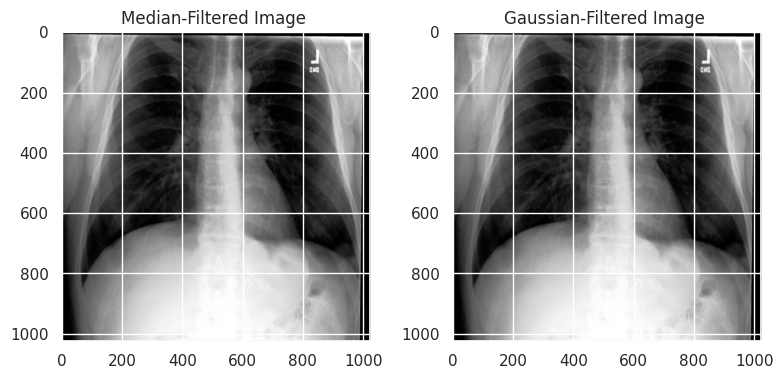

In [20]:
median_filtered = first_image.median_filtered(data={'inplace': False}) # Resme uygulamayalım sadece etkisini görelim -> inplace=False
gaussian_filtered = first_image.gaussian_filtered()

first_image.draw_blur()



```
median_filtered = cv2.medianBlur(self.raw_image, 5)
```


Median Blur, bir görüntüdeki gürültüyü azaltmak için kullanılır. Özellikle tuz ve biber gürültüsü (salt-and-pepper noise) gibi ani yoğunluk değişikliklerini etkili bir şekilde giderir. Median Blur için open cv kütüphanesinde yer alan (cv2.medianBlur()) methodu kullanılmıştır. Bir pikselin değerini belirlemek için, o pikselin komşuluğundaki değerler alınır (örneğin, 3x3 veya 5x5 bir pencere). Komşuluk içerisindeki yoğunluk değerlerinin medyanı hesaplanır ve merkeze bu değer atanır. Gürültü değerleri genellikle uç değerler olduğundan, medyan hesabı bu uç değerlerin etkisini azaltır. Bizim örneğimizde kernel boyutu olarak "5" kullanılmıştır. 5x5 boyutunda bir pencere (komşuluk alanı) kullanılacağını belirtir. Her piksel için, bu 5x5 alan içindeki piksel değerleri alınır ve bu değerlerin medyanı hesaplanır. Pikselin yeni değeri, bu medyan değer olur.



```
gaussian_filtered = cv2.GaussianBlur(self.raw_image, (5, 5), 0)
```


Gaussian Blur, bir görüntüyü pürüzsüzleştirmek ve genel gürültüyü azaltmak için kullanılır. Bu yöntem, görüntüdeki yüksek frekans bileşenlerini filtreler ve daha doğal bir bulanıklaştırma sağlar. Gaussian Blur için open cv kütüphanesinde yer alan (cv2.GaussianBlur) methodu kullanılmıştır. Bu işlem, görüntüyü bulanıklaştırırken kenarları yumuşatır. Kernel boyutu olarak (5x5) seçilmiştir. Çekirdek, her bir pikselin çevresindeki piksellerle olan ilişkisini hesaplarken ağırlıklar uygular. Çekirdek büyüdükçe bulanıklaştırma etkisi artar. Sigma değeri olarak 0 seçişmiştir. Gauss fonksiyonunun standart sapmasını (sigma) ifade eder. Daha yüksek sigma değerleri, daha fazla bulanıklaştırma etkisi yaratır.




# Döndürme ve Ayna Çevirme (Flipping)

 Döndürme ve Ayna Çevirme yapıp, görüntüleri Çizelim.

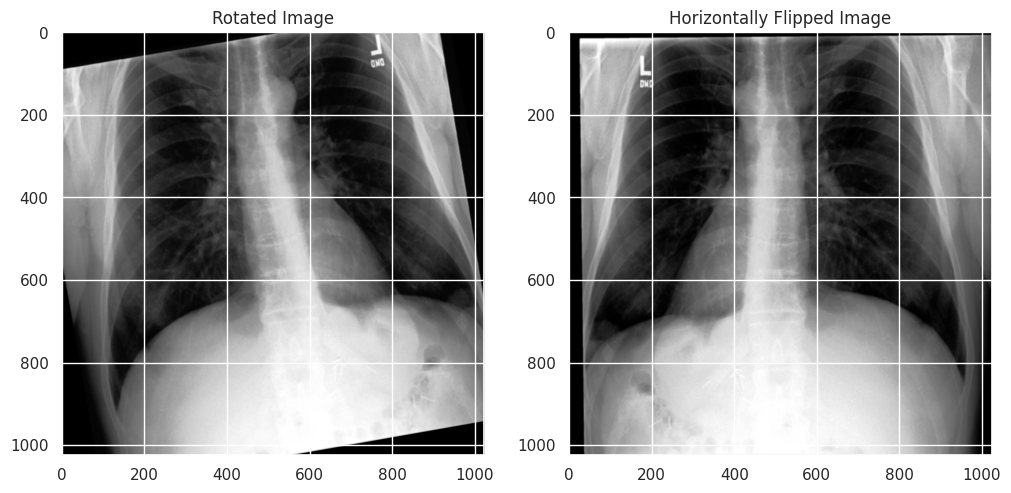

In [21]:
rotated_image = first_image.rotate(data={'angle': 10, 'inplace': False})  # Resme uygulamayalım sadece etkisini görelim -> inplace=False
flipped_horizontal = first_image.flipped_horizontal(data={'inplace': False})  # Resme uygulamayalım sadece etkisini görelim -> inplace=False

first_image.draw_rotate()

Rotate (Döndürme) ve Horizontal Flip (Yatay Çevirme), görüntü işleme ve veri artırma süreçlerinde kullanılan temel tekniklerdir. Bu işlemler, görüntülerin görünümlerini değiştirerek farklı amaçlarla (Görsel Çeşitlilik, Açısal Esneklik, Veri Artırma, Veri Çeşitliliği, Simetri Sağlama, Doğal Görünüm Sağlama vb.) kullanılabilmesini kılar. Döndürme veya yatay çevirme, her durumda mantıklı olmayabilir. Örneğin, metin içeren görüntülerde yatay çevirme, metnin ters görünmesine yol açabilir Döndürme açıları veya yatay çevirme işlemleri, gerçek dünya verilerine uygun şekilde seçilmelidir.


# Frekans Alanında Filtreleme

 Frekans alanında düşük frekansları geçiren filtreleme yapıp, görüntüleri çizelim.

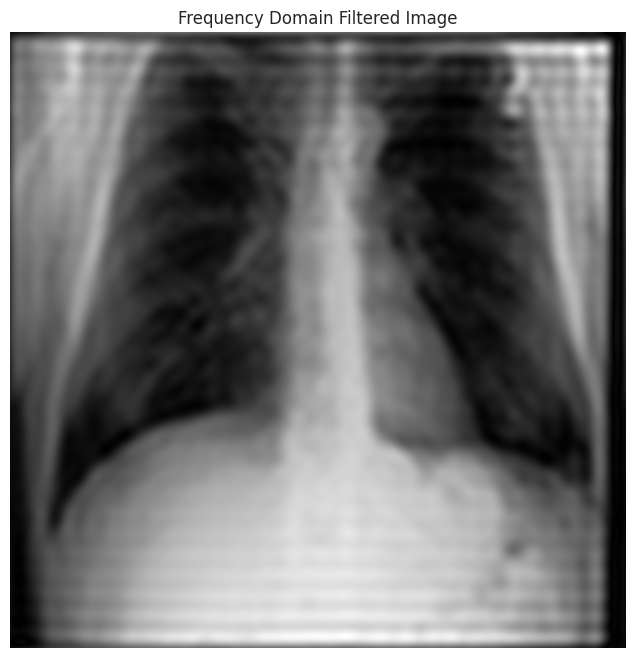

In [22]:
filtered_image = first_image.fourier_transform_filtered(data={'inplace': False})

first_image.draw_filtered()

Fourier frekans dönüşümü ile görüntü frekans alanına çevrilmiş ve düşük frekansları geçiren bir maske uygulanmıştır. Bu sayade düşük frekanslar korunarak, görüntüden ince detaylar (gürültü veya kenarlar vb) kaldırılmıştır
Bu kod, görüntü işleme projelerinde frekans bazlı filtreleme yapmanın temel bir örneğidir. Gürültü azaltma, Görüntü pürüzsüzleştirme, Görüntü analizinde düşük frekans bileşenlerinin vurgulanması vb uygulamalar için kullanılır.


# Keskinleştirme ve Enterpolasyon

Keskinleştirme ve enterpolasyon yapıp, görüntüleri çizelim.

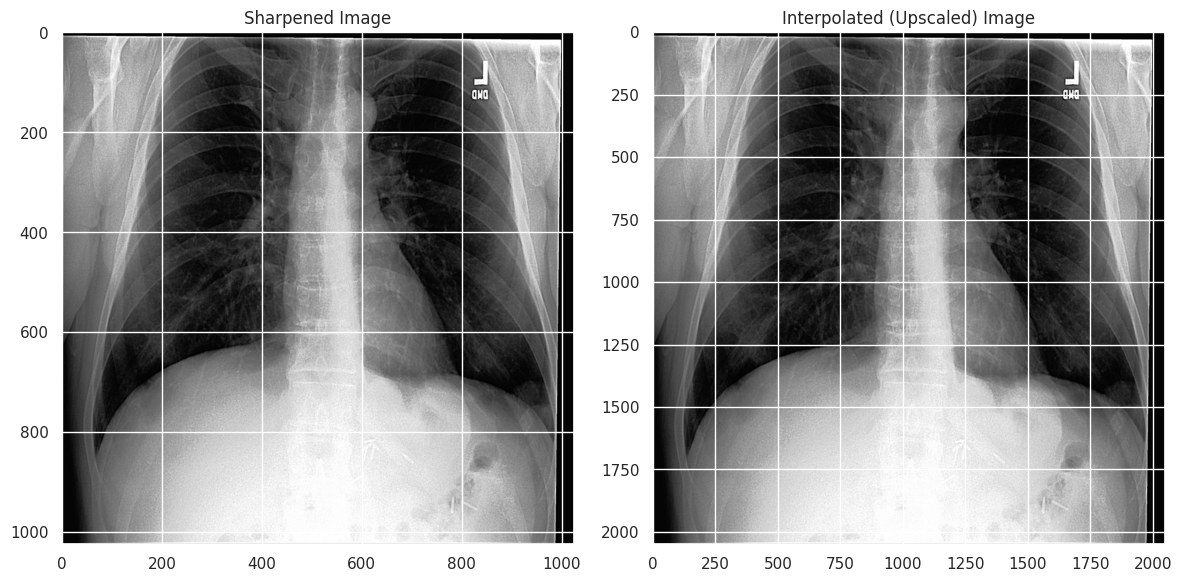

In [23]:
sharpened_image = first_image.sharpened_image()
resized_image = first_image.resized_image(data={'inplace': False})

first_image.draw_sharpened()

Unsharp Masking, bir görüntüyü keskinleştirmek için kullanılan bir tekniktir. Bu yöntem, bir görüntüyü önce bulanıklaştırır (blur) ve sonra bu bulanıklaştırılmış görüntüyü orijinal görüntüden çıkararak keskinleştirir. Sonuç olarak, kenarları ve ince detayları daha belirgin hale getirir.

Bicubic Enterpolasyon, görüntü işleme ve dijital görüntü büyütme (resampling) işlemlerinde kullanılan gelişmiş bir enterpolasyon yöntemidir. Bu yöntem, bir görüntüyü yeniden boyutlandırırken piksellerin yalnızca komşularına değil, aynı zamanda çevresindeki daha geniş bir alana da bakarak daha pürüzsüz ve daha doğru sonuçlar üretir.


# Pipeline

Yukarıda bir görüntü için tüm işlemleri yaptık. Bu işlemlerin hepsini yapan bir Pipeline oluşturalım. Resmin çağırdığımızda tüm işlemleri sırasıyla yapsın.

In [25]:
def pipeline(image, i):

    print(f"CHEST X-RAY8  IMAGE {i} : PRE-PROCESSING START")

    n = CV(image)

    n.statistics()

    n.histogram()

    print("Kontrast Germe (Stretching) & Histogram Eşitleme (Equalization) & Gamma Düzeltme")
    contrast_stretching = n.contrast_stretching()
    histogram_equalization = n.histogram_equalization()
    gamma_correction = n.gamma_correction()

    n.draw()

    print("Median Blur & Gaussian Blur")
    median_filtered = n.median_filtered(data={'inplace': False})
    gaussian_filtered = n.gaussian_filtered()

    n.draw_blur()

    print("Döndürme & Ayna Çevirme")
    rotate = n.rotate(data={'angle': 10, 'inplace': False})
    flipped_horizontal = n.flipped_horizontal(data={'inplace': False})

    n.draw_rotate()

    print("Frekans Alanında Filtreleme")
    fourier_transform_filtered = n.fourier_transform_filtered(data={'inplace': False})

    n.draw_filtered()

    print("Keskinleştirme ve Enterpolasyon")
    sharpened_image = n.sharpened_image()
    resized_image = n.resized_image(data={'inplace': False})

    n.draw_sharpened()

    print(f"CHEST X-RAY8  IMAGE {i} : PRE-PROCESSING END")
    print(f"-------------------------------------------------------------------")



Rasgele seçtiğimiz 9 görüntü için Pipeline çalıştıralım.

In [ ]:
# Seçilen Tüm Random Resimler İçin Pipeline Uygula

for i in range(9):
    pipeline(random_images[i], i)

Github Tüm Resimleri Yüklediğimde Render Edemedi Buradaki Resimlere PDF dosyasından veya COlab'dan bakabilirsiniz.

https://colab.research.google.com/drive/1YzeWEeBZaTV1GlLvaE7IJodWyVcMGiDV?usp=sharing